# Conflict Among Groups within Afghanistan from 1989 - 2018

Goals: To initially look at the underlying factors that may affect deaths per year.  Initial analysis will involve researching the dataset. 

In [57]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 

In [58]:
# Read API data saved in CSV then display

file = 'Data_Files/conflict_data.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,0,147793,NaN,2014,True,Clear,2,13204,13204,Benghazi Revolutionaries Shura Council - Force...,...,2014-10-16T00:00:00,9,3,4,9,25,25,25,NaN,NaN
1,1,216014,NaN,2015,True,Clear,2,13204,13204,Benghazi Revolutionaries Shura Council - Force...,...,2015-05-24T00:00:00,0,3,0,0,3,3,3,NaN,NaN
2,2,39309,NaN,1998,True,Clear,1,375,375,Senegal: Casamance,...,1998-10-20T00:00:00,0,60,0,0,60,60,60,433.0,NaN
3,3,41052,NaN,2011,True,Clear,1,11346,11346,Libya: Government,...,2011-06-10T00:00:00,0,10,0,21,31,31,31,620.0,NaN
4,4,190115,NaN,2012,True,Clear,1,432,432,Russia (Soviet Union): Caucasus Emirate,...,2012-02-18T00:00:00,5,6,0,0,11,11,11,365.0,NaN


In [59]:
# Filter only Afghanistan Data
df_afgh = df[df['country']=='Afghanistan']
df_afgh.head()

# View all the columns
#pd.set_option('display.max_columns', 500)
#df_afgh.head()


,Unnamed: 0,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
22,22,129939,NaN,1989,True,Clear,1,333,333,Afghanistan: Government,...,1989-03-31T00:00:00,0,0,0,4,4,4,0,700.0,NaN
34,34,135793,NaN,2005,True,Clear,1,333,333,Afghanistan: Government,...,2005-11-30T00:00:00,1,0,0,0,1,1,1,700.0,NaN
38,38,126229,NaN,2007,True,Clear,1,333,333,Afghanistan: Government,...,2007-01-11T00:00:00,0,16,0,0,16,29,16,700.0,NaN
39,39,126650,NaN,2007,True,Clear,1,333,333,Afghanistan: Government,...,2007-06-18T00:00:00,16,70,0,0,86,146,37,700.0,NaN
42,42,126688,NaN,2007,True,Clear,1,333,333,Afghanistan: Government,...,2007-06-30T00:00:00,0,35,31,0,66,107,43,700.0,NaN


In [60]:
# how many Afghanistan records
len(df_afgh)

28929

In [61]:
# Isolate columns of interest

df_afgh = df_afgh[['country', 'side_a', 'side_b', 'date_start', 'date_end', 'year', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'latitude', 'longitude', 'where_coordinates']]
df_afgh

,country,side_a,side_b,date_start,date_end,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,latitude,longitude,where_coordinates
22,Afghanistan,Government of Afghanistan,Hizb-i Islami-yi Afghanistan - Khalis faction,1989-03-31T00:00:00,1989-03-31T00:00:00,1989,0,0,0,4,4,34.428844,70.455750,Jalalabad town
34,Afghanistan,Government of Afghanistan,Taleban,2005-11-29T00:00:00,2005-11-30T00:00:00,2005,1,0,0,0,1,32.975180,69.192429,Urgun district
38,Afghanistan,Government of Afghanistan,Taleban,2007-01-10T00:00:00,2007-01-11T00:00:00,2007,0,16,0,0,16,31.829363,64.608526,Nahri Sarraj district (Greshk)
39,Afghanistan,Government of Afghanistan,Taleban,2007-06-16T00:00:00,2007-06-18T00:00:00,2007,16,70,0,0,86,32.929620,66.260800,Chora district
42,Afghanistan,Government of Afghanistan,Taleban,2007-06-29T00:00:00,2007-06-30T00:00:00,2007,0,35,31,0,66,31.901400,64.744900,Haydarabad village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152601,Afghanistan,Government of Afghanistan,"Government of United Kingdom, Government of Un...",2001-10-12T00:00:00,2001-10-13T00:00:00,2001,0,0,0,20,20,34.817973,63.586809,Qadis district
152606,Afghanistan,Government of Afghanistan,"Government of United Kingdom, Government of Un...",2001-10-13T00:00:00,2001-10-13T00:00:00,2001,0,0,1,0,1,34.531094,69.162796,Kabul city
152612,Afghanistan,Government of Afghanistan,"Government of United Kingdom, Government of Un...",2001-10-15T00:00:00,2001-10-15T00:00:00,2001,0,0,0,1,1,34.128700,70.241800,Goro Khel village
152613,Afghanistan,Government of Afghanistan,"Government of United Kingdom, Government of Un...",2001-10-15T00:00:00,2001-10-15T00:00:00,2001,0,0,0,0,0,34.985958,63.129742,Qala-I- Naw town


In [62]:
# how many cities are used in the data set
df_afgh['where_coordinates'].describe()

count          28929
unique          3862
top       Kabul city
freq             920
Name: where_coordinates, dtype: object

In [63]:
# Top 20 cities by Best Estimate of Deaths
df_afgh[['where_coordinates', 'best']].groupby('where_coordinates').sum().sort_values(by=['best'], ascending=False).head(20)

,best
where_coordinates,
Kabul city,20202
Afghanistan,14451
Mazari Sharif town,8160
Hilmand province,3067
Khost town,2869
Jalalabad town,2525
Taluqan town,2422
Shibirghan town,2336
Nad Ali district (Marja),2123


C:\Users\ejwda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


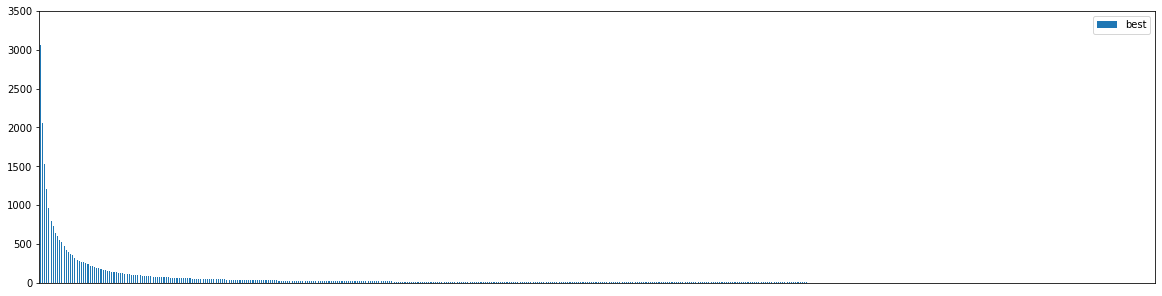

In [64]:
#Note:  The first few results are actually above y:3500; limited the axis to see the other data
df_afgh[['where_coordinates', 'best']].groupby('where_coordinates').sum().sort_values(by=['best'], ascending=False).plot(kind='bar', ylim=(0, 3500), figsize=(20,5))
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()

In [65]:
# who are the side_a groups?
df_afgh['side_a'].describe()

count                         28929
unique                           22
top       Government of Afghanistan
freq                          27374
Name: side_a, dtype: object

In [66]:
# who are the side_b groups?
df_afgh['side_b'].describe()

count       28929
unique         26
top       Taleban
freq        24253
Name: side_b, dtype: object

In [67]:
# further inspection of side_a
df_afgh['side_a'].value_counts()

Government of Afghanistan                          27374
Taleban                                              963
IS                                                   206
Government of United States of America               202
Jam'iyyat-i Islami-yi Afghanistan                     75
Hizb-i Islami-yi Afghanistan                          58
Government of Pakistan                                10
Forces of Amanullah Khan                              10
Hizb-i Wahdat                                          9
High Council of Afghanistan Islamic Emirate, IS        6
UIFSA                                                  3
Government of Tajikistan                               2
Forces of Sayed Mansur Naderi                          2
LeJ                                                    1
Forces of Abdul Rahman Khan                            1
Government of India                                    1
Taleban - Ali Dad faction                              1
Harakat-i Inqilab-i Islami-yi A

In [68]:
# further inspection of side_b
df_afgh['side_b'].value_counts()

Taleban                                                                 24253
IS                                                                       1290
Civilians                                                                1135
UIFSA                                                                     911
Junbish-i Milli-yi Islami                                                 332
Hizb-i Islami-yi Afghanistan                                              304
al-Qaida                                                                  202
Hizb-i Islami-yi Afghanistan - Khalis faction                             138
Government of United Kingdom, Government of United States of America      100
Jam'iyyat-i Islami-yi Afghanistan                                          96
Hizb-i Wahdat                                                              81
High Council of Afghanistan Islamic Emirate                                41
TTP                                                             

In [69]:
# side_a and side_b independent don't seem that helpful.  I want to combine side_a and side_b to show conflict pairs.
# I think I need to make this text string alphabetical so a&b and b&a groups result as the same string

# separate data
a=df_afgh['side_a']
b=df_afgh['side_b']

# create a list of tuples [(side_a, side_b)]
c=list(zip(a,b))

# create an empty storage list for final combined strings
d=[]

# for each item in the list of tubples, sort the tuples in alphabetical order and store in d[]
for i in range(len(c)):
    d.append(sorted(c[i]))

# for each item in the list, combine them into one string and store in d[]    
for i in range(len(d)):
    d[i]=d[i][0]+' and '+d[i][1]
    
# add list of strings to original dataframe
df_afgh['paired_groups']=d

#display 50 records and inspect 
#df_afgh.head(50)
df_afgh.head()

,country,side_a,side_b,date_start,date_end,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,latitude,longitude,where_coordinates,paired_groups
22,Afghanistan,Government of Afghanistan,Hizb-i Islami-yi Afghanistan - Khalis faction,1989-03-31T00:00:00,1989-03-31T00:00:00,1989,0,0,0,4,4,34.428844,70.455750,Jalalabad town,Government of Afghanistan and Hizb-i Islami-yi...
34,Afghanistan,Government of Afghanistan,Taleban,2005-11-29T00:00:00,2005-11-30T00:00:00,2005,1,0,0,0,1,32.975180,69.192429,Urgun district,Government of Afghanistan and Taleban
38,Afghanistan,Government of Afghanistan,Taleban,2007-01-10T00:00:00,2007-01-11T00:00:00,2007,0,16,0,0,16,31.829363,64.608526,Nahri Sarraj district (Greshk),Government of Afghanistan and Taleban
39,Afghanistan,Government of Afghanistan,Taleban,2007-06-16T00:00:00,2007-06-18T00:00:00,2007,16,70,0,0,86,32.929620,66.260800,Chora district,Government of Afghanistan and Taleban
42,Afghanistan,Government of Afghanistan,Taleban,2007-06-29T00:00:00,2007-06-30T00:00:00,2007,0,35,31,0,66,31.901400,64.744900,Haydarabad village,Government of Afghanistan and Taleban


In [70]:
#Who are the conflict pairs?
df_afgh['paired_groups'].describe()

count                                     28929
unique                                       43
top       Government of Afghanistan and Taleban
freq                                      24077
Name: paired_groups, dtype: object

In [71]:
# inspect combined a & b
df_afgh['paired_groups'].value_counts()

Government of Afghanistan and Taleban                                                                 24077
Government of Afghanistan and IS                                                                       1289
Civilians and Taleban                                                                                   922
Government of Afghanistan and UIFSA                                                                     911
Government of Afghanistan and Hizb-i Islami-yi Afghanistan                                              302
Government of Afghanistan and Junbish-i Milli-yi Islami                                                 254
Government of United States of America and al-Qaida                                                     202
Civilians and Government of Afghanistan                                                                 138
Government of Afghanistan and Hizb-i Islami-yi Afghanistan - Khalis faction                             138
IS and Taleban              

In [72]:
df_afgh[['paired_groups', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown','best']].sum()

paired_groups       Government of Afghanistan and Hizb-i Islami-yi...
deaths_a                                                        38243
deaths_b                                                       114687
deaths_civilians                                                25696
deaths_unknown                                                  48890
best                                                           227516
dtype: object

In [73]:
df_afgh[['paired_groups','deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown','best']].groupby(['paired_groups'], as_index=False).sum().sort_values('best', ascending=False)


,paired_groups,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
20,Government of Afghanistan and Taleban,29421,97640,10443,8203,145707
21,Government of Afghanistan and UIFSA,5388,3630,1275,15492,25785
12,Government of Afghanistan and Hizb-i Islami-yi...,516,1026,1897,6141,9580
17,Government of Afghanistan and Junbish-i Milli-...,227,403,133,8270,9033
15,Government of Afghanistan and IS,325,7503,316,308,8452
0,Civilians and Government of Afghanistan,0,0,7089,28,7117
13,Government of Afghanistan and Hizb-i Islami-yi...,922,2014,216,2871,6023
16,Government of Afghanistan and Jam'iyyat-i Isla...,516,363,133,1848,2860
26,Government of United States of America and al-...,68,1140,203,1185,2596
4,Civilians and Taleban,0,0,1771,197,1968


In [74]:
# View effects by year
df_groups = df_afgh[['paired_groups','side_a', 'side_b', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'year']].groupby(['year'], as_index=False).sum()
df_groups.head()

,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,1989,226,839,303,4043,5411
1,1990,331,393,101,689,1514
2,1991,977,1297,49,1230,3553
3,1992,97,90,1695,2503,4385
4,1993,121,435,637,2912,4105


In [75]:
# How many records - duh - 30 years of data
len(df_groups)

30

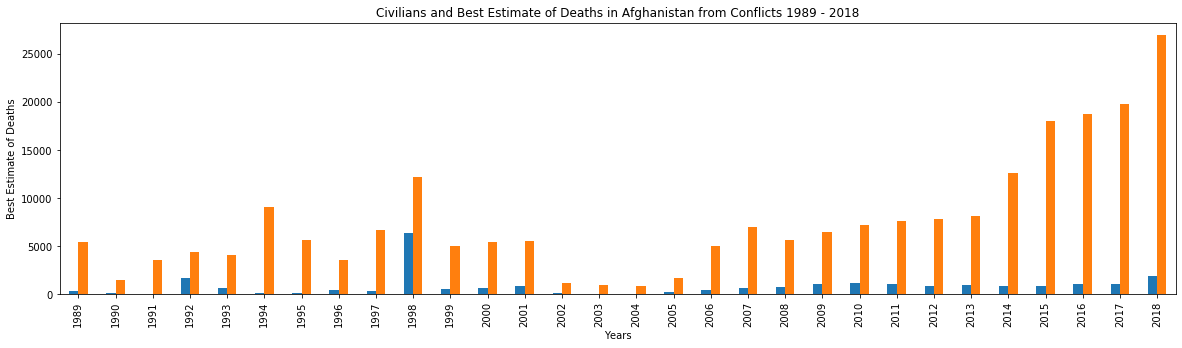

In [76]:
%matplotlib inline 
ax = df_groups[['year','deaths_civilians', 'best']].plot(x='year', kind='bar', figsize=(20,5))
ax.set_xlabel('Years')
ax.set_ylabel('Best Estimate of Deaths')
plt.title('Civilians and Best Estimate of Deaths in Afghanistan from Conflicts 1989 - 2018')
plt.gca().legend_.remove()
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./images/bar_conflict_civilians_by_year.png', bbox_inches='tight')

In [77]:
# View effects by year
df_groups = df_afgh[['paired_groups','side_a', 'side_b', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'year']].groupby(['paired_groups','year'], as_index=False).sum()
df_groups.head()

,paired_groups,year,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,Civilians and Government of Afghanistan,1992,0,0,8,0,8
1,Civilians and Government of Afghanistan,1993,0,0,26,0,26
2,Civilians and Government of Afghanistan,1996,0,0,5,0,5
3,Civilians and Government of Afghanistan,1997,0,0,323,0,323
4,Civilians and Government of Afghanistan,1998,0,0,5801,0,5801


In [78]:
len(df_groups)

197

In [79]:
# View effects by year_group
df_groups = df_afgh[['paired_groups','side_a', 'side_b', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'year']].groupby(['year','paired_groups'], as_index=False).sum()
df_groups.to_clipboard()
df_groups.head(20)

,year,paired_groups,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,1989,Government of Afghanistan and Hizb-i Islami-yi...,0,1,0,180,181
1,1989,Government of Afghanistan and Hizb-i Islami-yi...,94,667,198,2434,3393
2,1989,Government of Afghanistan and Hizb-i Wahdat,0,4,0,21,25
3,1989,Government of Afghanistan and Jam'iyyat-i Isla...,108,115,105,1217,1545
4,1989,Government of Afghanistan and Mahaz-i Milli-yi...,20,10,0,0,30
5,1989,Harakat-i Inqilab-i Islami-yi Afghanistan and...,0,0,0,70,70
6,1989,Hizb-i Islami-yi Afghanistan and Jam'iyyat-i I...,4,42,0,121,167
7,1990,Government of Afghanistan and Hizb-i Islami-yi...,220,78,1,287,586
8,1990,Government of Afghanistan and Hizb-i Islami-yi...,30,125,0,23,178
9,1990,Government of Afghanistan and Hizb-i Wahdat,0,0,0,25,25


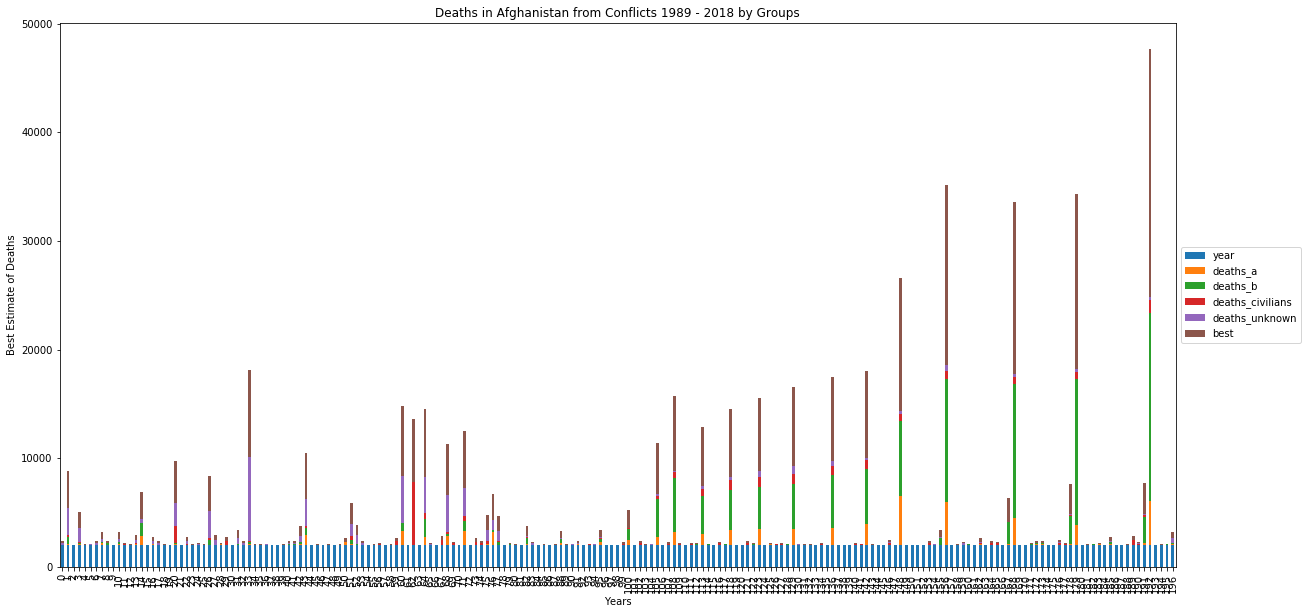

In [80]:
#rough plot to just see what this looks like; ignore the year data
ax = df_groups.plot(kind='bar', stacked=True, figsize=(20,10))
ax.set_xlabel('Years')
ax.set_ylabel('Best Estimate of Deaths')
plt.title('Deaths in Afghanistan from Conflicts 1989 - 2018 by Groups')
#plt.gca().legend_.remove()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./images/line_conflict_groups_by_year_legend2.png', bbox_inches='tight')

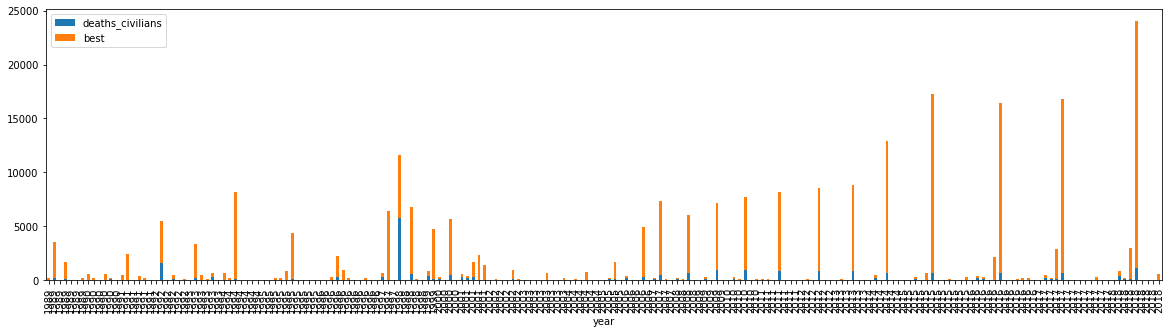

In [81]:
# See what the civilian and best total estimate compare
#I don't like this plot because it is difficult to determine who is the groups involves and if there were no deaths
#for a time period then it leaves a blank.  I am going to try to do a matplotlib custom plot that reduceds the gaps
#and fixes the labels.
df_groups[['year','deaths_civilians', 'best']].plot(x='year',kind='bar', stacked=True, figsize=(20,5))

So I can interpret the chart above but the x-label is useless; I am going to try to manipulate the data and use matplotlib.

In [82]:
# What is the latest year in the dataset
df_groups['year'].max()

2018

In [83]:
# What is the earliest year in the dataset
df_groups['year'].min()

1989

In [84]:
#create list of conflict pairs 
#I am doing this because I am having an issue with the dataframe being generated.  I missing something from 
#how I am specifying the frame.  This has taken up more time than to just manually find the values so I am
#going to do a manual method to get my data and then go back to find the pandas dataframe  method.
#Update:  I did determine what I was doing wrong and verified that the two methods result in teh same.  I will use
#pandas in the future.

group_names = list(df_groups['paired_groups'].unique())
#create a list of years
year_range=[i for i in range(1989,2019)]

#create lists to store bar width and best estimate of deaths
plot_best=[]
plot_bar_width=[]

# k iterator represents a conflict group pair and starts the collection of best death estimate by year
for k in range(len(group_names)):
    
    #filter year and best estimate death data into lists
    actual_years=list(df_groups[df_groups['paired_groups']==group_names[k]]['year'])
    actual_deaths=list(df_groups[df_groups['paired_groups']==group_names[k]]['best'])
    
    #not all years have a death so the list created is inconsistent
    #below, i make sure that years without a death are now set as a 0
    #years list is 30 items long and best death estimate is 30 items long
    best_data=[]
    final_year=[]
    
    # j is just used to track progress - see below
    j=0
    
    #iterate over each year/death data in list (30 years)
    for i in range(len(year_range)):
        
        #this is complicated so i.e.  j starts as 0 and if year array is only 3 years of data then
        #I check to see if the first list item in actual_years matches the first year 1989
        # if it does then the actual_deaths and year are inserted into a new list and j is incremented
        #on the next iteration it does the same check and if there is not match in 1990 then it sets
        #the year to 1990 and the death estimate to zero and then checks for the next year without incrementing j
        #so it keeps doing this until the new list is completely filled.  j increments until all the existng 
        #records have been accounted for and therefore all other values must be zeros for the death totals.
        if j<len(actual_years):
            if ((year_range[i]) == int(actual_years[j])):
                best_data.insert(i, actual_deaths[j])
                final_year.insert(i, int(actual_years[j]))
                j= j+1
            else:
                best_data.insert(i, 0)
                final_year.insert(i, year_range[i])
        else:
            best_data.insert(i, 0)
            final_year.insert(i, year_range[i])
            
    #store each list of a conflict group in a list - create a list of lists
    plot_best.append(best_data)
    
    #create a list of bar widths - not really sure why I did this originally
    bar_width=[0 if x == 0 else 0.25 for x in best_data]
    plot_bar_width.append(bar_width)

    

Check code by comparing the group data and year to final list

In [85]:
#group data of best estimate of deaths
list(df_groups[df_groups['paired_groups']==group_names[0]]['best'])

[181,
 586,
 451,
 3890,
 3160,
 669,
 207,
 30,
 32,
 40,
 76,
 54,
 98,
 49,
 10,
 35,
 10,
 2]

In [86]:
#get list of years
list(df_groups[df_groups['paired_groups']==group_names[0]]['year'])

[1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 2002,
 2003,
 2006,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2016]

In [87]:
# missing years with 0 deaths:  96, 97, 98, 99, 00, 01, 04, 05, 07, 15, 17, 18
# it works as well for the other ranges
plot_best[0]

[181,
 586,
 451,
 3890,
 3160,
 669,
 207,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 32,
 0,
 0,
 40,
 0,
 76,
 54,
 98,
 49,
 10,
 35,
 10,
 0,
 2,
 0,
 0]

In [88]:
df_bar_plot = pd.DataFrame.from_records(plot_best, columns=year_range, index=group_names)
df_bar_plot = df_bar_plot.transpose()
df_bar_plot

,Government of Afghanistan and Hizb-i Islami-yi Afghanistan,Government of Afghanistan and Hizb-i Islami-yi Afghanistan - Khalis faction,Government of Afghanistan and Hizb-i Wahdat,Government of Afghanistan and Jam'iyyat-i Islami-yi Afghanistan,Government of Afghanistan and Mahaz-i Milli-yi Islami-yi Afghanistan,Harakat-i Inqilab-i Islami-yi Afghanistan and Ittihad-i Islami Bara-yi Azadi-yi Afghanistan,Hizb-i Islami-yi Afghanistan and Jam'iyyat-i Islami-yi Afghanistan,Government of Afghanistan and Military faction (forces of Shahnawaz Tanay),Hizb-i Islami-yi Afghanistan and Jamiat-ul-Dawa,Civilians and Government of Afghanistan,...,Government of Pakistan and TTP,Civilians and IS,Forces of Mullah Abdol Rauf Khadim and Taleban,Government of Afghanistan and IS,High Council of Afghanistan Islamic Emirate and Taleban,"High Council of Afghanistan Islamic Emirate, IS and Taleban",IS and Taleban,Government of India and Kashmir insurgents,Government of Iraq and IS,TTP-KM and TTP-SM
1989,181,3393,25,1545,30,70,167,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,586,178,25,581,0,0,36,108,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,451,2441,25,385,0,0,200,0,51,0,...,0,0,0,0,0,0,0,0,0,0
1992,3890,11,351,35,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
1993,3160,0,476,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0
1994,669,0,191,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,207,0,168,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,314,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,323,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,5801,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#alternate method of creating dataframe
df_groups2 = df_afgh[['paired_groups', 'best', 'year']].groupby(['year','paired_groups'], as_index=False).sum()
df22 = df_groups2.pivot_table(index='year', columns='paired_groups', aggfunc=np.sum).fillna(0)
df22

best  \
paired_groups Civilians and Government of Afghanistan   
year                                                    
1989                                              0.0   
1990                                              0.0   
1991                                              0.0   
1992                                              8.0   
1993                                             26.0   
1994                                              0.0   
1995                                              0.0   
1996                                              5.0   
1997                                            323.0   
1998                                           5801.0   
1999                                            436.0   
2000                                            152.0   
2001                                            298.0   
2002                                             11.0   
2003                                              0.0   
2004                                              0.0   
2005                                              2.0   
2006                                              0.0   
2007                                              0.0   
2008                                              0.0   
2009                                              4.0   
2010                                              3.0   
2011                                              0.0   
2012                                              0.0   
2013                                              1.0   
2014                                              2.0   
2015                                              6.0   
2016                                             12.0   
2017                                              8.0   
2018                                             19.0   

                                                                 \
paired_groups Civilians and Government of Russia (Soviet Union)   
year                                                              
1989                                                        0.0   
1990                                                        0.0   
1991                                                        0.0   
1992                                                        0.0   
1993                                                        0.0   
1994                                                        0.0   
1995                                                        4.0   
1996                                                        0.0   
1997                                                        0.0   
1998                                                        0.0   
1999                                                        0.0   
2000                                                        0.0   
2001                                                        0.0   
2002                                                        0.0   
2003                                                        0.0   
2004                                                        0.0   
2005                                                        0.0   
2006                                                        0.0   
2007                                                        0.0   
2008                                                        0.0   
2009                                                        0.0   
2010                                                        0.0   
2011                                                        0.0   
2012                                                        0.0   
2013                                                        0.0   
2014                                                        0.0   
2015                                                        0.0   
2016                                                        0.0   
2017                                                        0.0   
2018                   

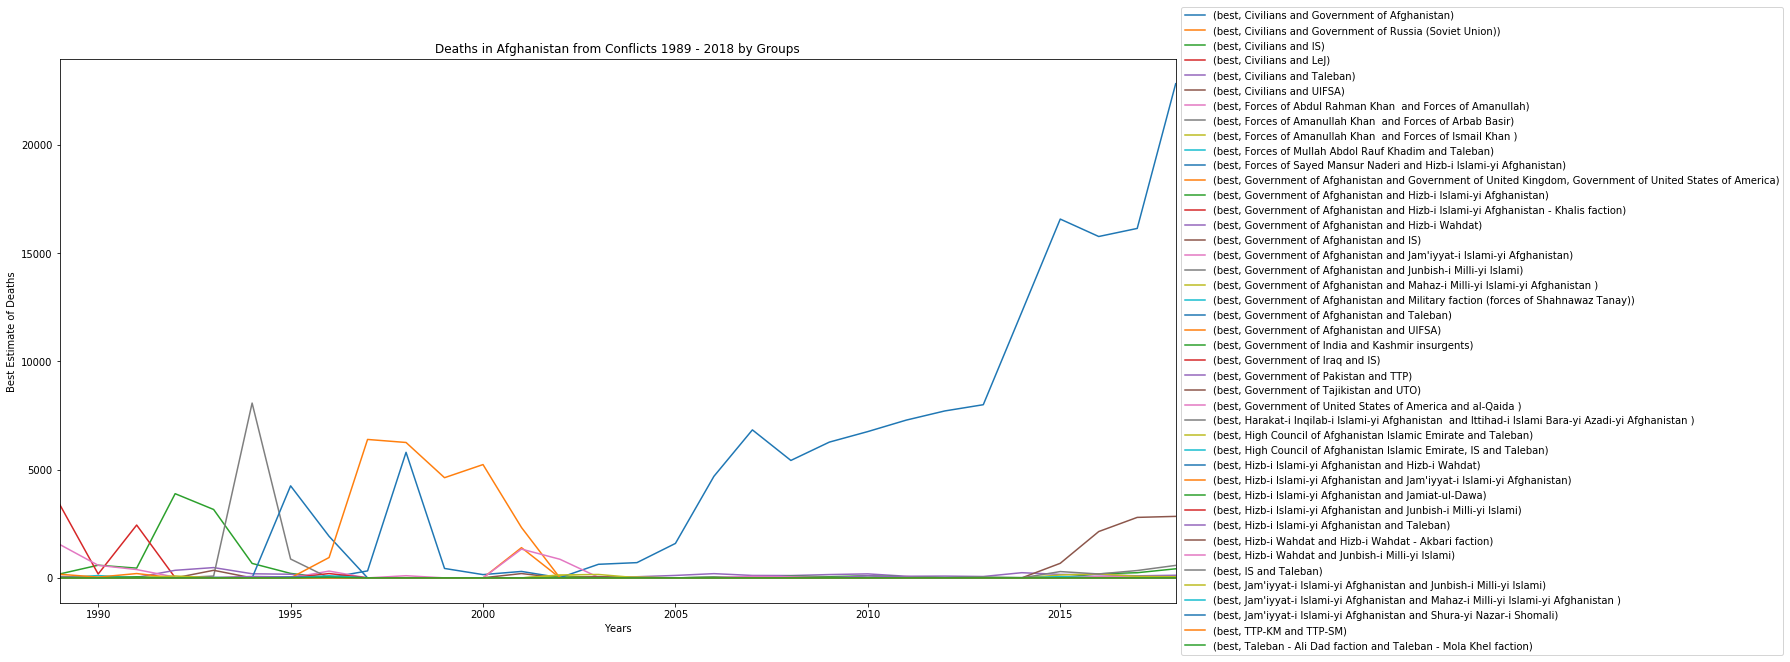

In [90]:
#Plot of alternative method; it's the same as my manual method - I will use the 
ax = df22.plot(figsize=(20,10))
ax.set_xlabel('Years')
ax.set_ylabel('Best Estimate of Deaths')
plt.title('Deaths in Afghanistan from Conflicts 1989 - 2018 by Groups')
#plt.gca().legend_.remove()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./images/line_conflict_groups_by_year_legend22.png', bbox_inches='tight')

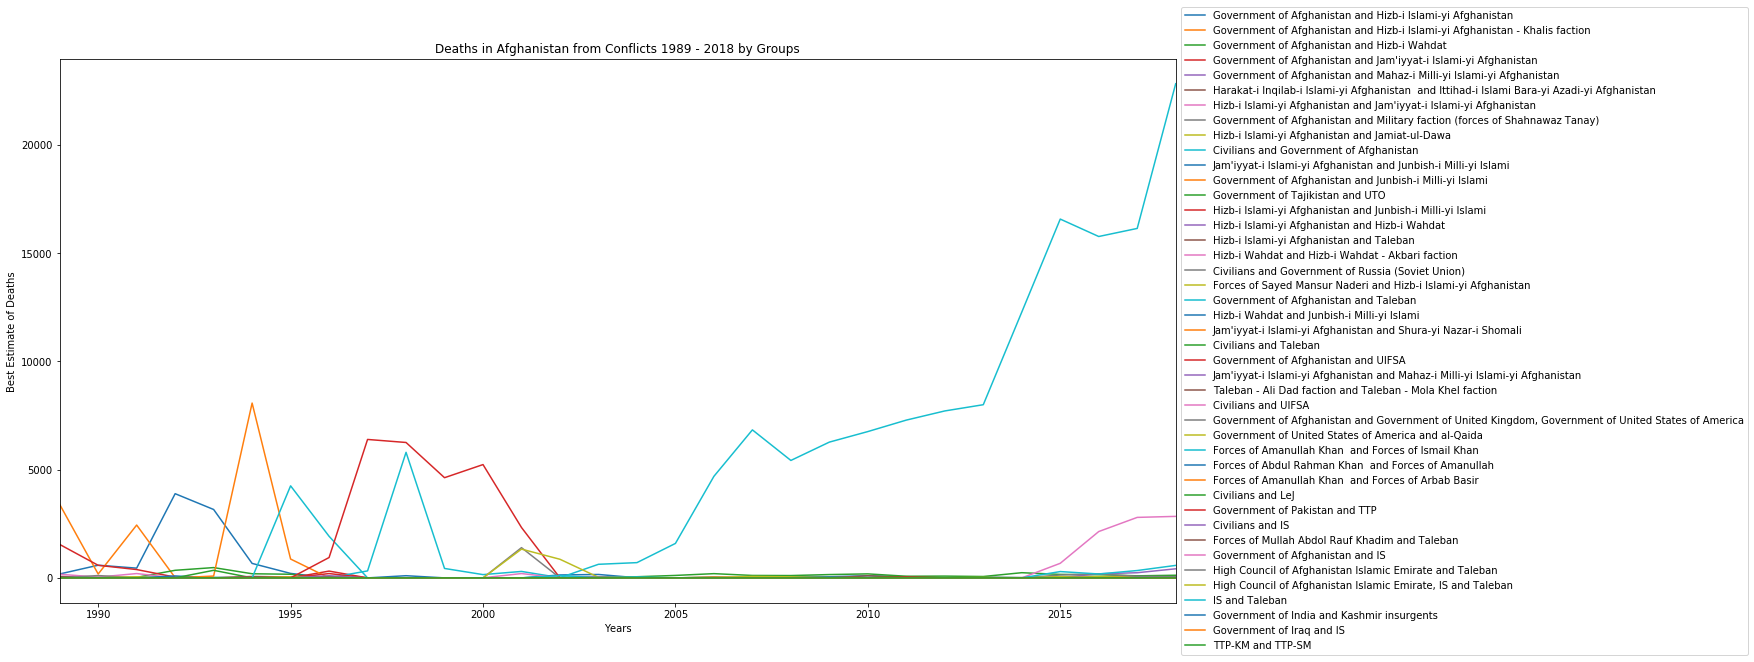

In [91]:
#plot of the looped dataframe - manual method
df_bar_plot = pd.DataFrame.from_records(plot_best, columns=year_range, index=group_names)
df_bar_plot = df_bar_plot.transpose()
ax = df_bar_plot.plot(figsize=(20,10))
ax.set_xlabel('Years')
ax.set_ylabel('Best Estimate of Deaths')
plt.title('Deaths in Afghanistan from Conflicts 1989 - 2018 by Groups')
#plt.gca().legend_.remove()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./images/line_conflict_groups_by_year_legend.png', bbox_inches='tight')

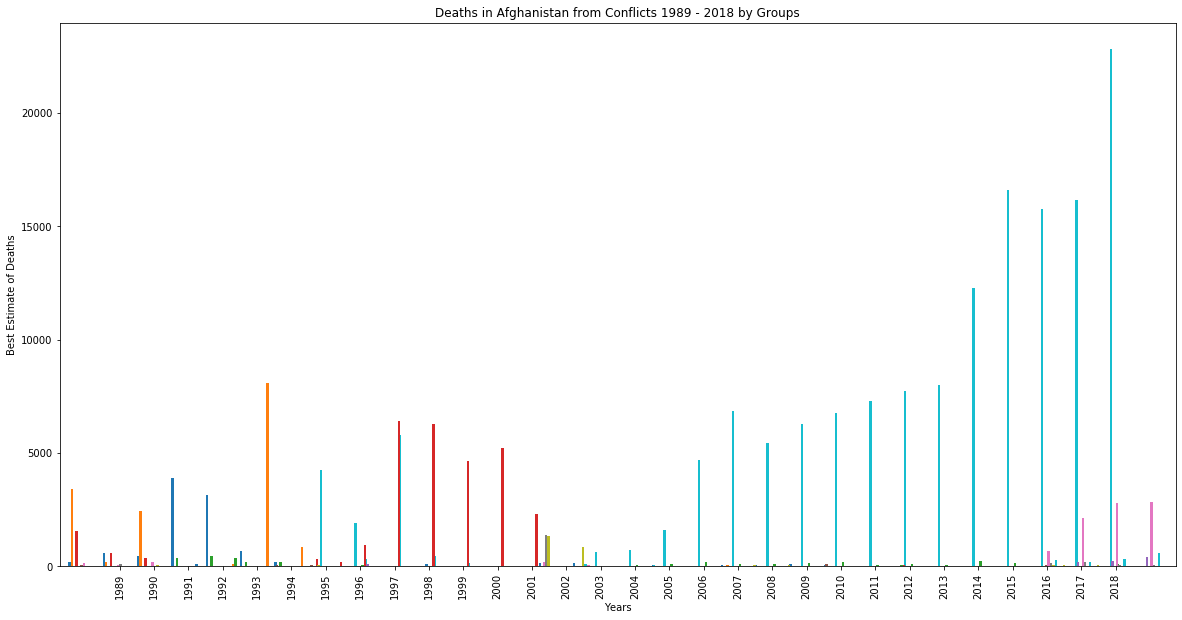

In [92]:
#I don't like this plot because it is difficult to determine who is the groups involves and if there were no deaths
#for a time period then it leaves a blank.  I am going to try to do a matplotlib custom plot that reduceds the gaps
#and fixes the labels. Plus something looks wrong with it.
#Correction - by changing the width it made more of the data show up - that is a bit disconcerting that would 
#manually need adjusted

df_bar_plot = pd.DataFrame.from_records(plot_best, columns=year_range, index=group_names)
df_bar_plot = df_bar_plot.transpose()
ax = df_bar_plot.plot(kind='bar', stacked=False, width=3, figsize=(20,10))
ax.set_xlabel('Years')
ax.set_ylabel('Best Estimate of Deaths')
plt.title('Deaths in Afghanistan from Conflicts 1989 - 2018 by Groups')
plt.gca().legend_.remove()
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./images/bar_conflict_groups_by_year1.png', bbox_inches='tight')

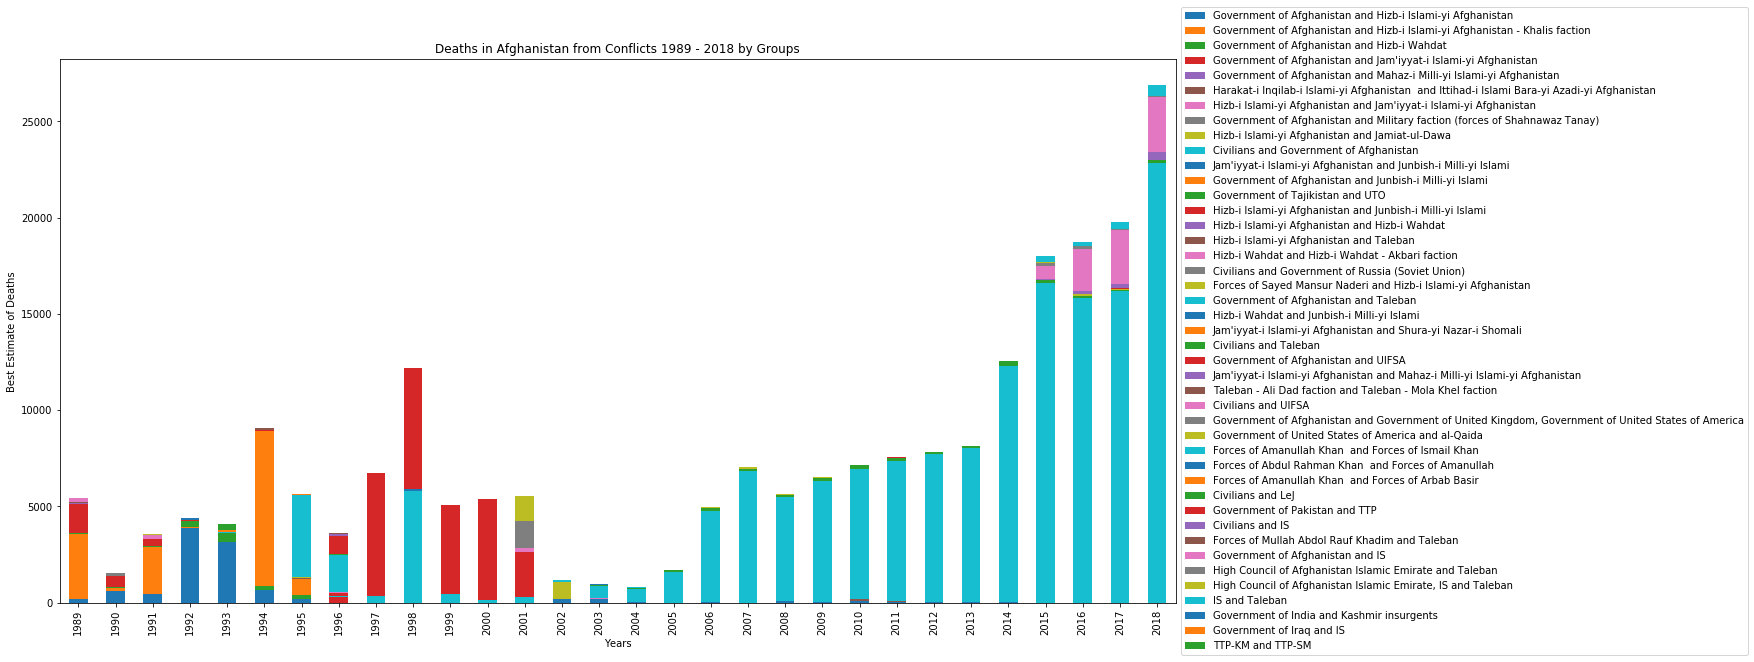

In [93]:
df_bar_plot = pd.DataFrame.from_records(plot_best, columns=year_range, index=group_names)
df_bar_plot = df_bar_plot.transpose()
ax = df_bar_plot.plot(kind='bar', stacked=True, figsize=(20,10))
ax.set_xlabel('Years')
ax.set_ylabel('Best Estimate of Deaths')
plt.title('Deaths in Afghanistan from Conflicts 1989 - 2018 by Groups')
plt.gca().legend_.remove()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./images/stacked_conflict_groups_by_year.png', bbox_inches='tight')


## Using Matplotlib to make custom bar graph (test)


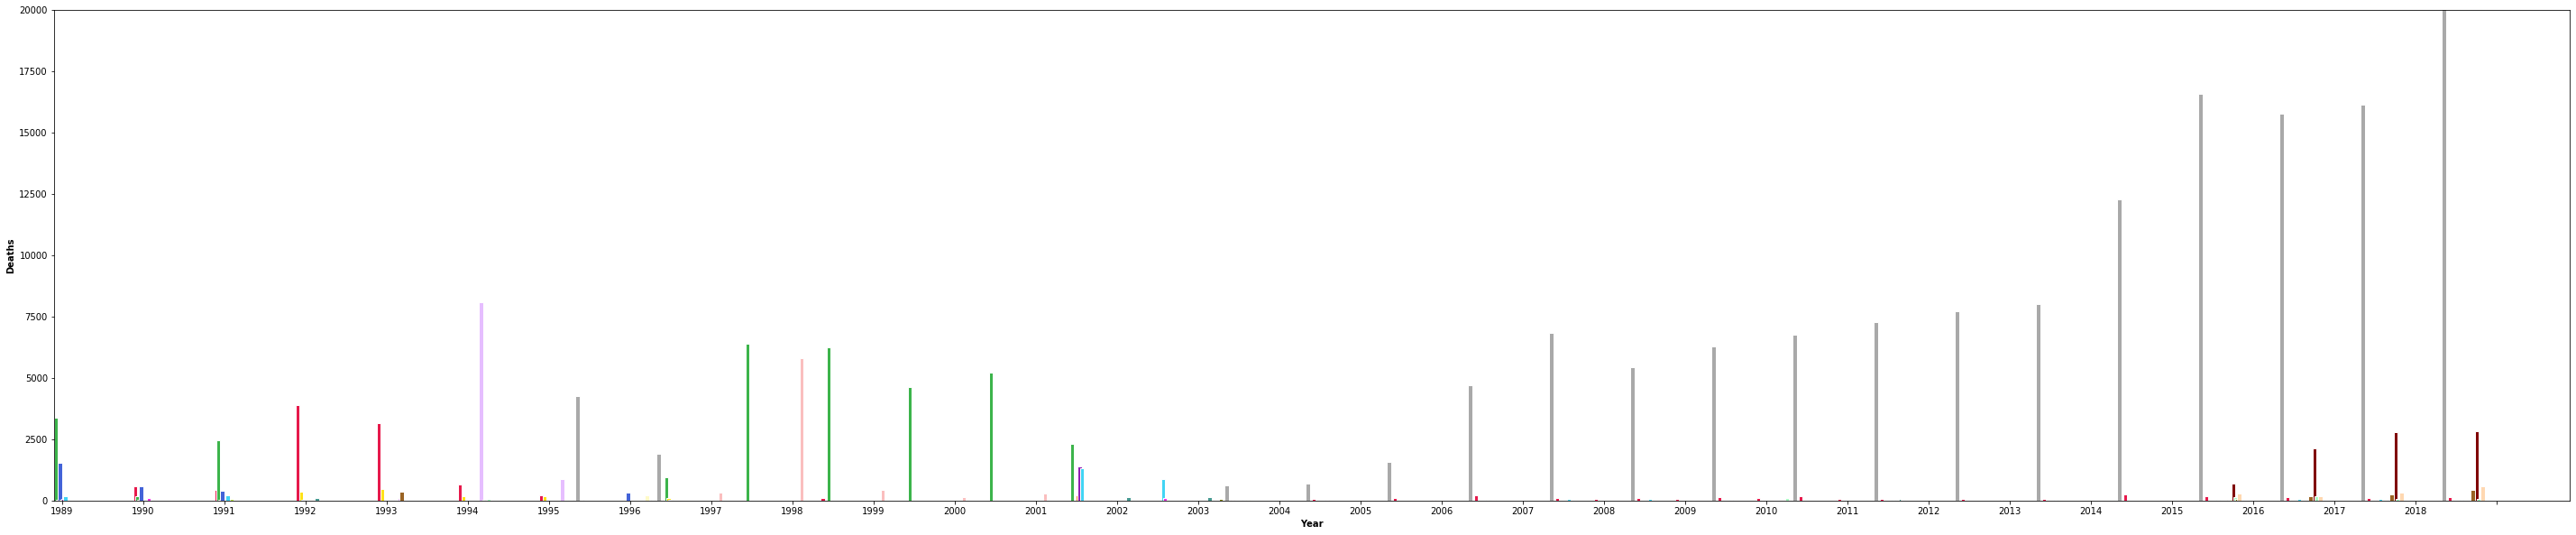

In [94]:

# this is my somewhat unsuccess attempt of trying to group bars closer to each other around a year marker
# I have commented out the the code that I was starting to test, where I was seeing if a value was zero
# and from there I was trying to set the next space assignment to be more to the left so it covers the space
# where the void rectangle would have been.  I need to improve my indexing and right now this is not a priority 
#so I am going back to doing analysis

#setup plots size and line colors
plt.figure(figsize=(50,10))
color_sel = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabebe', '#469990', '#e6beff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#e6194B', '#000000', '#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabebe', '#469990', '#e6beff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#e6194B', '#000000']


r_vals=[]

r1 = list(np.arange(len(plot_best[0])))
r_vals.append(r1)
bar_width= 1/(len(group_names)-1)


for i in range(len(group_names)-1):     #len(final_year)-1
    r_temp=[]
    
    # loop over the length of the year data
    for x in range(len(final_year)):           #len(r1)
#         if plot_best[i][x]==0:
#             tmp_val = r_vals[i][x-1]
#         else:
#             tmp_val = bar_width + r_vals[i][x]
#         r_temp.append(tmp_val)    
        r_temp.append(bar_width + r_vals[i][x])
    r_vals.append(r_temp)

# https://python-graph-gallery.com/11-grouped-barplot/

for i in range(len(group_names)):
    plt.bar(r_vals[i], plot_best[i], color=color_sel[i], width=0.05, edgecolor='white', label=group_names[i])

plt.xlabel('Year', fontweight='bold')
plt.xticks([r + 0.1 for r in range(len(group_names))], final_year)
plt.ylabel('Deaths', fontweight='bold')

#plt.legend()
axes = plt.gca()
axes.set_xlim([0,31])
axes.set_ylim([0,20000])
plt.show()

## Monthly Data Using Matplotlib
This is just for my development of what matplotlib can do as a customizing and looping feature

In [95]:
df_year=[]
df_month=[]
df_day=[]
df_date = df_afgh['date_start'].str.split('-')
df_date = df_date.reset_index()
for i in range(len(df_date)):
    df_year.append(df_date.loc[i][1][0])
    df_month.append(df_date.loc[i][1][1])
    df_day.append(df_date.loc[i][1][2][:2])
df_afgh['year2']=df_year
df_afgh['month']=df_month
df_afgh['day']=df_day


In [96]:
#df_afgh.head()

In [97]:
new_df=df_afgh[['paired_groups','side_a', 'side_b', 'latitude', 'longitude', 'date_start', 'year2', 'month', 'day', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best']]
new_df.head()

,paired_groups,side_a,side_b,latitude,longitude,date_start,year2,month,day,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
22,Government of Afghanistan and Hizb-i Islami-yi...,Government of Afghanistan,Hizb-i Islami-yi Afghanistan - Khalis faction,34.428844,70.455750,1989-03-31T00:00:00,1989,03,31,0,0,0,4,4
34,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,32.975180,69.192429,2005-11-29T00:00:00,2005,11,29,1,0,0,0,1
38,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,31.829363,64.608526,2007-01-10T00:00:00,2007,01,10,0,16,0,0,16
39,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,32.929620,66.260800,2007-06-16T00:00:00,2007,06,16,16,70,0,0,86
42,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,31.901400,64.744900,2007-06-29T00:00:00,2007,06,29,0,35,31,0,66


In [98]:
month_data = new_df.groupby(['month'])[['deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best']].sum()
month_data

,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
month,,,,,
01,5307,6145,1608,9168,22228
02,1548,6576,974,1714,10812
03,3423,8908,1147,3244,16722
04,3347,8081,2164,2404,15996
05,4119,10893,1632,6198,22842
06,3127,9884,1657,2460,17128
07,2890,12108,2255,4429,21682
08,3405,13508,7595,5724,30232
09,3483,11738,2156,3651,21028


In [99]:
len(month_data['deaths_a'])

12

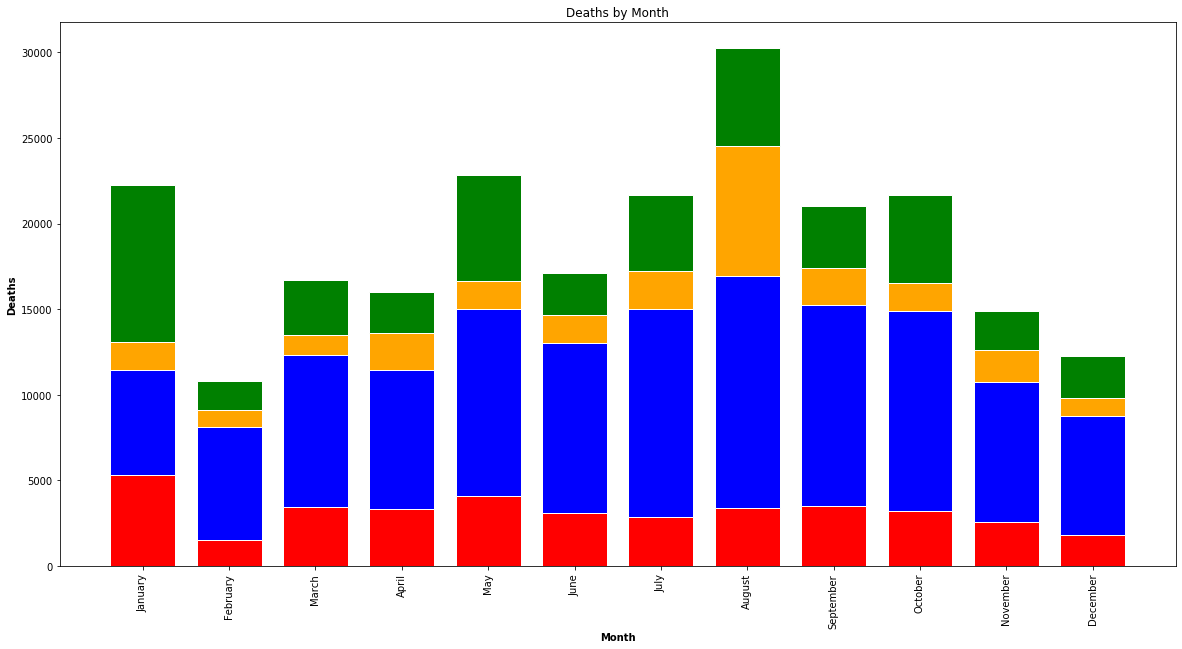

In [100]:
#matplotlib stacked bar with full customization

fig = plt.figure(figsize=(20, 10))
# ax = fig.add_axes([0,0,1,1])

m_stack = np.arange(len(month_data['deaths_a']))
da = list(month_data['deaths_a'])
db = list(month_data['deaths_b'])
dc = list(month_data['deaths_civilians'])
du = list(month_data['deaths_unknown'])

dc_h = np.add(da, db).tolist()
du_h = np.add(dc_h, dc).tolist()
# du_h = np.add(dc_h, du).tolist()

names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bar_width = 0.75

plt.bar(m_stack, da, color='red', width=bar_width, edgecolor='white', label='Deaths Group A')
plt.bar(m_stack, db, bottom= da, color='blue', width=bar_width, edgecolor='white', label='Deaths Group B')
plt.bar(m_stack, dc, bottom= dc_h, color='orange', width=bar_width, edgecolor='white', label='Deaths Civilians')
plt.bar(m_stack, du, bottom= du_h, color='green', width=bar_width, edgecolor='white', label='Deaths Unknown')

plt.xlabel('Month', fontweight='bold')
plt.xticks(m_stack, names, rotation=90)
plt.ylabel('Deaths', fontweight='bold')
plt.title('Deaths by Month')
fig.savefig('./images/stacked_monthly_data.png')
plt.show()
plt.close()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [101]:
new_df=df_afgh[['paired_groups','side_a', 'side_b', 'latitude', 'longitude', 'date_start', 'year2', 'month', 'day', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best']]
new_df.head()

,paired_groups,side_a,side_b,latitude,longitude,date_start,year2,month,day,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
22,Government of Afghanistan and Hizb-i Islami-yi...,Government of Afghanistan,Hizb-i Islami-yi Afghanistan - Khalis faction,34.428844,70.455750,1989-03-31T00:00:00,1989,03,31,0,0,0,4,4
34,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,32.975180,69.192429,2005-11-29T00:00:00,2005,11,29,1,0,0,0,1
38,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,31.829363,64.608526,2007-01-10T00:00:00,2007,01,10,0,16,0,0,16
39,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,32.929620,66.260800,2007-06-16T00:00:00,2007,06,16,16,70,0,0,86
42,Government of Afghanistan and Taleban,Government of Afghanistan,Taleban,31.901400,64.744900,2007-06-29T00:00:00,2007,06,29,0,35,31,0,66


In [102]:
df_early_years = new_df[new_df['year2']<'1995'].groupby(['month'])[['deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown']].sum()

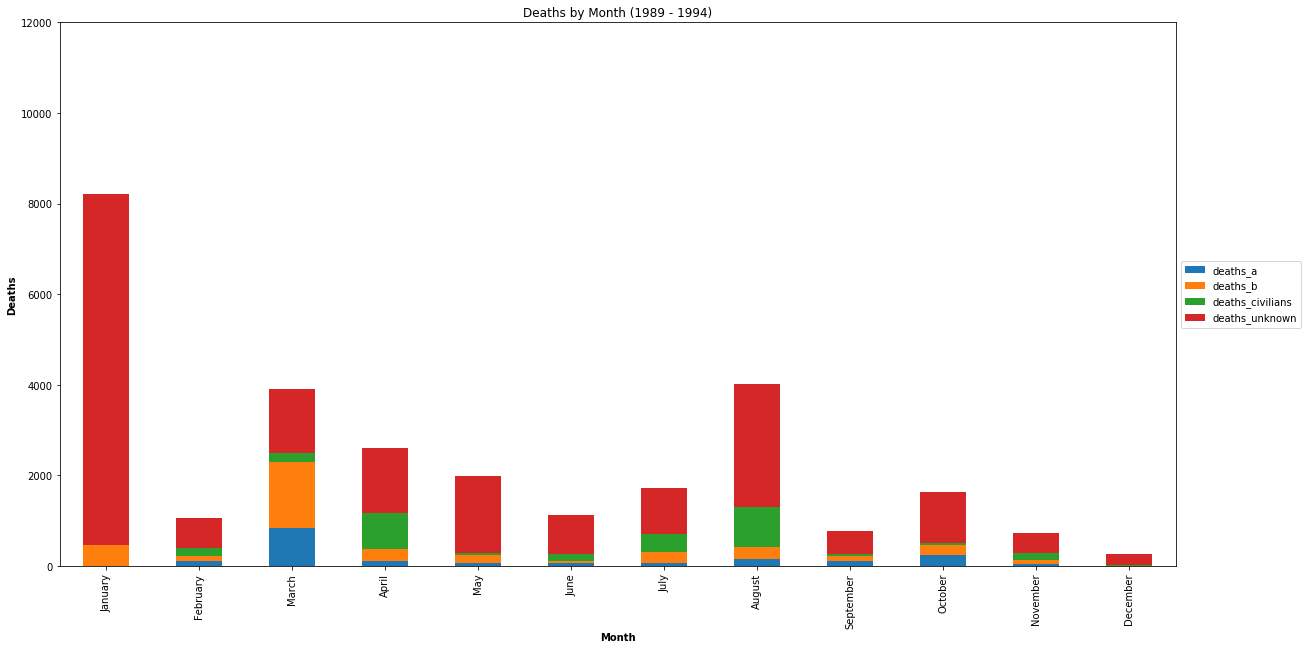

In [103]:
df_early_years.plot(kind='bar', stacked=True, figsize=(20,10), ylim=(0,12000))
names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(m_stack, names, rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Deaths', fontweight='bold')
plt.title('Deaths by Month (1989 - 1994)')
fig.savefig('./images/stacked_monthly_early_years_data.png')
plt.show()
plt.close()

In [104]:
df_late_years = new_df[new_df['year2']>'2012'].groupby(['month'])[['deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown']].sum()

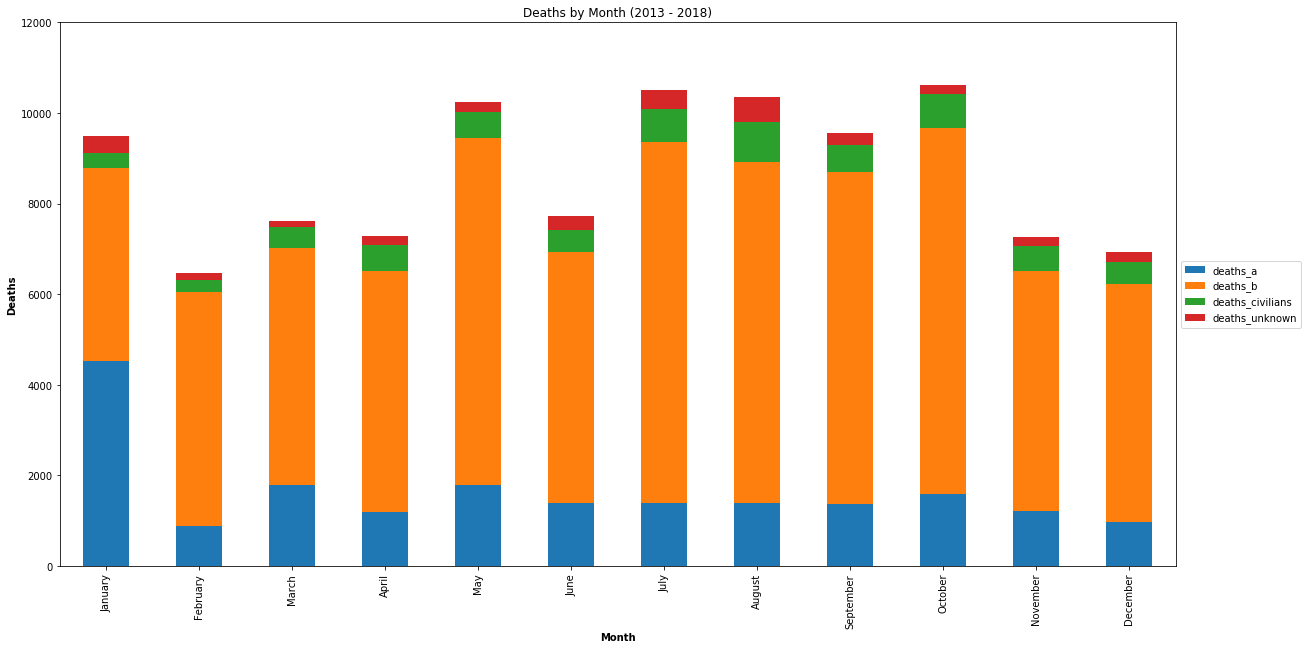

In [105]:
df_late_years.plot(kind='bar', stacked=True, figsize=(20,10), ylim=(0,12000))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(m_stack, names, rotation=90)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Deaths', fontweight='bold')
plt.title('Deaths by Month (2013 - 2018)')
fig.savefig('./images/stacked_monthly_late_years_data.png')
plt.show()
plt.close()

In [106]:
df_civilian_trends = new_df.groupby(['year2'])[['deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown']].sum()
df_civilian_trends

,deaths_a,deaths_b,deaths_civilians,deaths_unknown
year2,,,,
1989,226,839,303,4043
1990,331,393,101,689
1991,977,1297,49,1230
1992,97,90,1695,2503
1993,121,435,637,2912
1994,92,387,120,8457
1995,1054,941,185,3438
1996,450,454,483,2208
1997,1314,678,353,4376


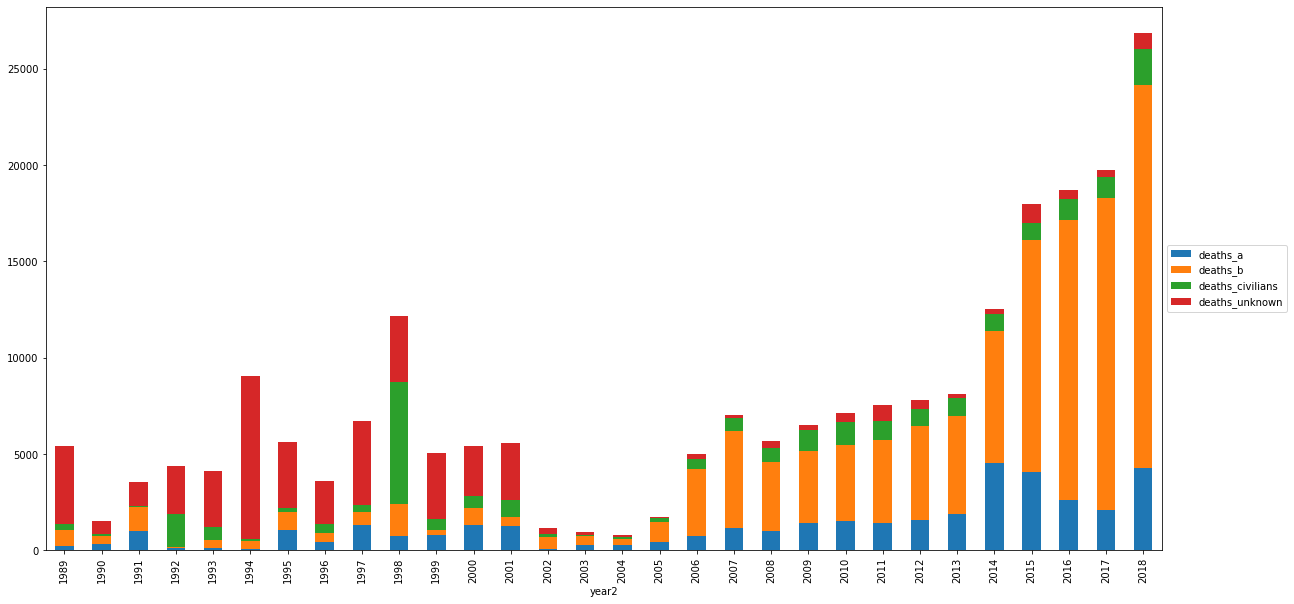

In [107]:
df_civilian_trends.plot(kind='bar', stacked=True, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.savefig('./images/stacked_all_years_data.png')
plt.show()
plt.close()